In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np

sns.set(style="whitegrid")

csv_path = "wandb_data_old/"

In [18]:
df = pd.read_csv(csv_path + "hidden_layer.csv")
df.head()

,Name,hidden_layer_size,mean_regret,env_id,noisy_net,seed,_wandb
0,conbandit_combi1_0__3__2025-06-19_18-03,100,83.256905,NNBandit-v0,False,3,NaN
1,conbandit_combi1_0__2__2025-06-19_18-03,100,71.282585,NNBandit-v0,False,2,NaN
2,conbandit_combi1_0__1__2025-06-19_18-03,100,77.121002,NNBandit-v0,False,1,NaN
3,conbandit_combi1_0__0__2025-06-19_18-03,100,67.786644,NNBandit-v0,False,0,NaN
4,conbandit_combi1_0__3__2025-06-19_18-02,100,71.242325,NNBandit-v0,True,3,NaN


In [14]:
# df = df[df.memory_size == 1000]
# df.info()

In [15]:
# x_name = 'batch_size'
# y_name = 'mean_regret'

# envs = df['env_id'].unique()
# colors = plt.cm.tab10(np.linspace(0, 1, len(envs)))
# color_map = dict(zip(envs, colors))

# plt.figure(figsize=(10, 5))

# for (env, seed), group_df in df.groupby(['env_id', 'seed']):
#     plt.plot(group_df[x_name],group_df[y_name],label=f'{env} - Seed {seed}',color=color_map[env])

# plt.title('Mean Regret vs Batch Size')
# plt.xlabel(x_name)
# plt.ylabel(y_name)
# plt.grid(True)
# plt.legend(title='Env - Seed', loc='upper left')
# plt.tight_layout()
# plt.show()

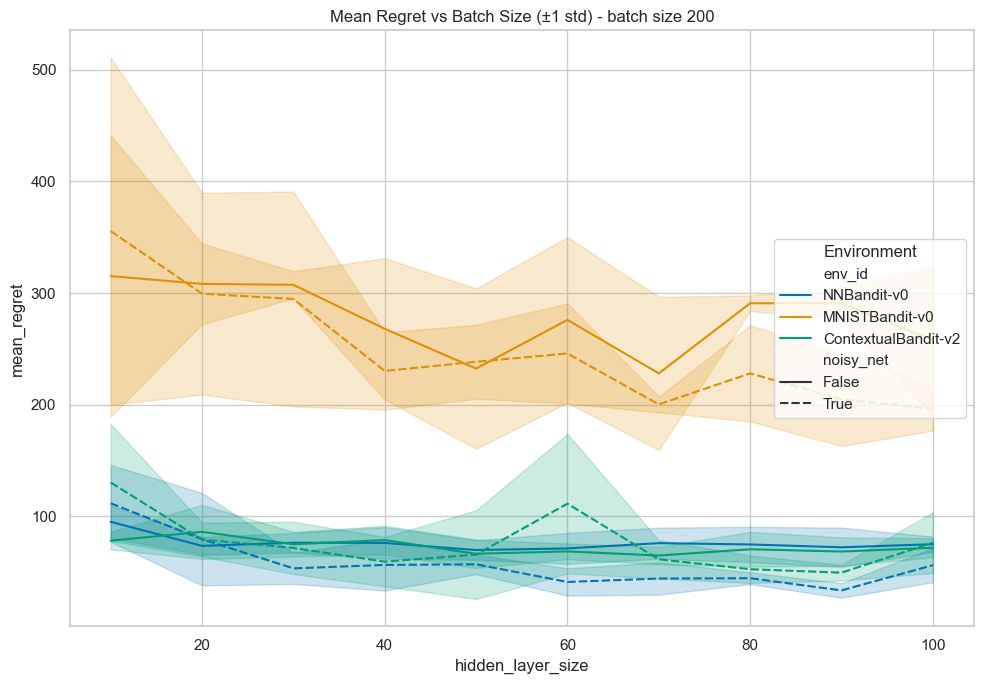

In [16]:
plt.figure(figsize=(10, 7))

sns.lineplot(
    data=df,
    x='hidden_layer_size',
    y='mean_regret',
    hue='env_id',
    style='noisy_net',
    errorbar='sd',
    palette='colorblind'
)

plt.title('Mean Regret vs Batch Size (±1 std) - batch size 200')
plt.xlabel('hidden_layer_size')
plt.ylabel('mean_regret')
plt.grid(True)
plt.legend(title='Environment', loc='center right')
plt.tight_layout()

plt.savefig("results/mean_regret_vs_hidden_layer_size__stationary.png", dpi=300, bbox_inches='tight')

plt.show()

In [17]:
df = pd.read_csv(csv_path + "big_sweep_200.csv")
plt.figure(figsize=(10, 7))

sns.lineplot(
    data=df[df.memory_size.isin([500, 1000, 1500, 2000])],
    x=x_name,
    y='mean_regret',
    hue='env_id',
    style='memory_size',
    errorbar='sd',
    palette='colorblind'
)

plt.title('Mean Regret vs Batch Size (±1 std) - Dynamic Rate 200')
plt.xlabel(x_name)
plt.ylabel('mean_regret')
plt.grid(True)
plt.legend(title='Environment', loc='center right')
plt.tight_layout()

plt.savefig("results/mean_regret_vs_batch_size__dynrate200.png", dpi=300, bbox_inches='tight')

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'wandb_data/big_sweep_200.csv'

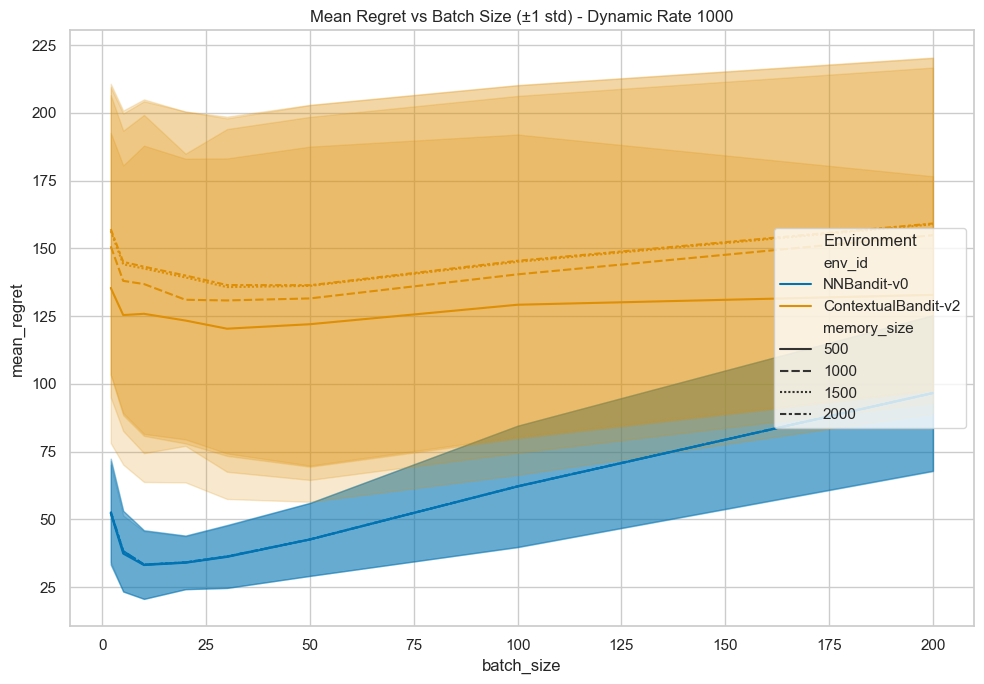

In [115]:
df = pd.read_csv(csv_path + "big_sweep_1000.csv")
plt.figure(figsize=(10, 7))

sns.lineplot(
    data=df[df.memory_size.isin([500, 1000, 1500, 2000])],
    x=x_name,
    y='mean_regret',
    hue='env_id',
    style='memory_size',
    errorbar='sd',
    palette='colorblind'
)

plt.title('Mean Regret vs Batch Size (±1 std) - Dynamic Rate 1000')
plt.xlabel(x_name)
plt.ylabel('mean_regret')
plt.grid(True)
plt.legend(title='Environment', loc='center right')
plt.tight_layout()

plt.savefig("results/mean_regret_vs_batch_size__dynrate1000.png", dpi=300, bbox_inches='tight')

plt.show()

In [25]:
dfx11 = df[(df['env_id'] == 'ContextualBandit-v2') & (df['noisy_net'] == True)]
dfx12 = df[(df['env_id'] == 'ContextualBandit-v2') & (df['noisy_net'] == False)]
dfx21 = df[(df['env_id'] == 'NNBandit-v0') & (df['noisy_net'] == True)]
dfx22 = df[(df['env_id'] == 'NNBandit-v0') & (df['noisy_net'] == False)]
dfx1.head()

,Name,hidden_layer_size,mean_regret,env_id,noisy_net,seed,_wandb
160,conbandit_combi1_0__3__2025-06-19_17-28,100,67.341979,ContextualBandit-v2,False,3,NaN
161,conbandit_combi1_0__2__2025-06-19_17-28,100,82.988274,ContextualBandit-v2,False,2,NaN
162,conbandit_combi1_0__1__2025-06-19_17-28,100,72.930204,ContextualBandit-v2,False,1,NaN
163,conbandit_combi1_0__0__2025-06-19_17-28,100,63.359207,ContextualBandit-v2,False,0,NaN
164,conbandit_combi1_0__3__2025-06-19_17-27,100,100.675322,ContextualBandit-v2,True,3,NaN


<Axes: xlabel='hidden_layer_size', ylabel='mean_regret'>

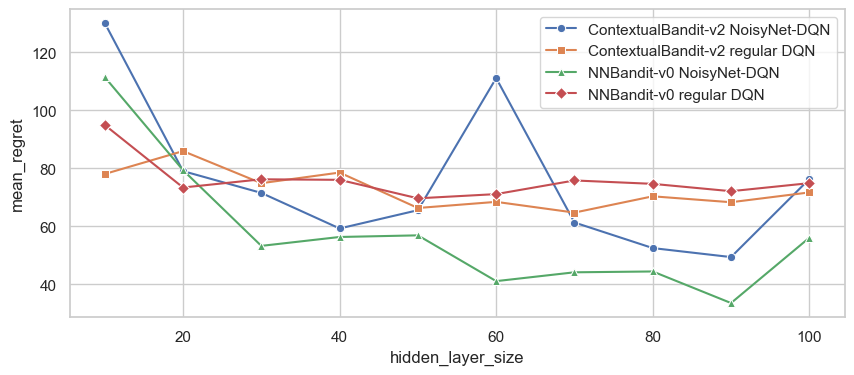

In [27]:
x_n = 'hidden_layer_size'
y_n = 'mean_regret'
_df11 = dfx11.groupby(x_n)[y_n].mean().reset_index()
_df12 = dfx12.groupby(x_n)[y_n].mean().reset_index()
_df21 = dfx21.groupby(x_n)[y_n].mean().reset_index()
_df22 = dfx22.groupby(x_n)[y_n].mean().reset_index()
plt.figure(figsize=(10, 4))
sns.lineplot(data=_df11, x=x_n, y=y_n, marker='o', label='ContextualBandit-v2 NoisyNet-DQN')
sns.lineplot(data=_df12, x=x_n, y=y_n, marker='s', label='ContextualBandit-v2 regular DQN')
sns.lineplot(data=_df21, x=x_n, y=y_n, marker='^', label='NNBandit-v0 NoisyNet-DQN')
sns.lineplot(data=_df22, x=x_n, y=y_n, marker='D', label='NNBandit-v0 regular DQN')